In [1]:
import numpy as np
from numpy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from persim import PersImage

In [14]:
pim_df = pd.read_csv("./pim_vectors_mp40.csv")
pim_df.head(50)

,px0,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px1592,px1593,px1594,px1595,px1596,px1597,px1598,px1599,gest,subj
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.492070e-02,2.128594e-02,4.209990e-03,9.759270e-05,1.683663e-06,1.017004e-04,8.097931e-04,8.304893e-04,5.0,30.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.0,30.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.0,30.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.486892e-02,3.087099e-03,3.109034e-04,1.333163e-05,7.443068e-08,4.471551e-11,5.826281e-13,1.045039e-14,2.0,30.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.979079e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.0,30.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.0,30.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.417444e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.0,30.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,30.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.468672e-02,2.327695e-03,4.255258e-05,7.933507e-08,1.403576e-11,2.282464e-16,0.000000e+00,0.000000e+00,6.0,30.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.695635e-10,1.000721e-14,2.092261e-13,2.381062e-09,2.536920e-06,2.685305e-04,3.148071e-03,4.670228e-03,2.0,30.0


In [15]:
px = 40
g5=pim_df.iloc[25,:-2].values.reshape(px, -1)
g3=pim_df.iloc[26,:-2].values.reshape(px, -1)
g4=pim_df.iloc[27,:-2].values.reshape(px, -1)
g2=pim_df.iloc[28,:-2].values.reshape(px, -1)
g2n=pim_df.iloc[29,:-2].values.reshape(px, -1)

In [16]:
pim = PersImage(spread=1e-5, pixels=[20,20], verbose=False)

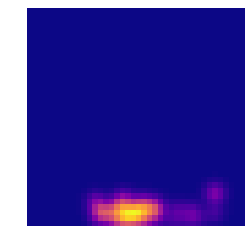

In [17]:
pim.show(g5)

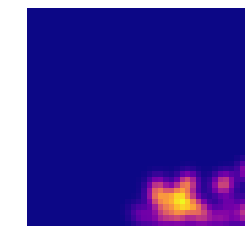

In [18]:
pim.show(g3)

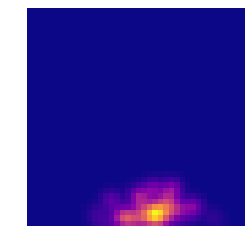

In [19]:
pim.show(g4)

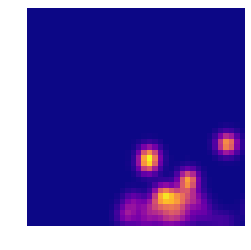

In [20]:
pim.show(g2)